# Exact diagonalization study of Heisenberg chain

This notebook contains breif notes and sample codes for solving Heisenberg chain using exact diagonalization method. It is for pedagogical purpose. The following text and codes are prepared by [Mr. Hongyu Lu（卢虹宇）](https://quantummc.xyz/members/hongyu-lu/) and [ZYM](https://quantummc.xyz/members/zi-yang-meng/).

##  Model

<font  face=Times color=darkblue size=3> The model hamiltonian is: $$H=J\sum_{<i,j>}\vec{S_i}\cdot \vec{S_j}=J\sum_{<i,j>}(\frac{1}{2}(S_i^+S_j^-+S_i^-S_j^+)+S_i^zS_j^z)$$ with the spin raising/lowering operators.<br><br> We consider $S=1/2$ 1-dimensional spin chain here.

## ED

<font  face=Times color=darkblue size=3>The basic idea is to construct the matrix of Hamiltonian and diagonalize it to get the eigenvalues and eigenvectors. <br><br> We choose the $S^z$ basis and use the bit representation. For example, for a N-spin chain, there are $2^N$ states and can be represented as: $$|0>=|\downarrow,\downarrow,...,\downarrow> (=00...0)$$ $$|1>=|\uparrow,\downarrow,...,\downarrow> (=00...1)$$ <br><br> To construct the matrix, we enumerate the states and $H_{ij}=<i|H|j>$. Please kind in mind that  that
* the pairs of spin raising/lowering opertors $S_i^+S_j^-$ can flip the spins thus providing the off-diagonal elements,
* while the $S_i^zS_j^z$ operators provide the diagonal elements.



In [46]:
import numpy as np
import matplotlib.pyplot as plt

#### About String concatenation

In [47]:
# To show the process
a='0001'
b='1111'
c='22222'

In [48]:
print('a:',a)
print('b:',b)
print('c:',c)
print('bin(a):', bin(10))

a: 0001
b: 1111
c: 22222
bin(a): 0b1010


In [49]:
print('concatenation:a+b+c:',a+b+c)

concatenation:a+b+c: 0001111122222


#### Code

In [50]:
# set parameters
N=9
dimension=2**N
#spin chain with all spin-down
z='0'*N
# initialize hamiltonian
H=np.zeros((dimension,dimension))
z

'000000000'

In [51]:
# Matrix Construction
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain # make the length equal to N
    print(state_chain)
  # for PBC, we set i in range(N)
  # for OBC, we set i in range(N-1)
    for i in range(N):
        j=np.mod(i+1,N)
 #       print(state_chain)
        if state_chain[i]==state_chain[j]: # i=j only diagonal elements
            H[a,a]+=0.25
#            print('a:',a)
        else:                              # else, the raising/lowering operators also have contributions
            H[a,a]-=0.25
            # then exchange i,j
            element_i=state_chain[i]
            element_j=state_chain[j]
            #flip
            if j==0:
#here we are doing the concatenation of string (you can try other methods)
#                    print(state_chain)
                state_chain1=element_i+state_chain[1:N-1]+element_j
            else:
                state_chain1=state_chain[0:i]+element_j+element_i+state_chain[j+1:]
#            print(state_chain)
            b=int(state_chain1,2)
#            print('a:',a)
#            print('b:',b)
            H[a,b]+=0.5

000000000
000000001
000000010
000000011
000000100
000000101
000000110
000000111
000001000
000001001
000001010
000001011
000001100
000001101
000001110
000001111
000010000
000010001
000010010
000010011
000010100
000010101
000010110
000010111
000011000
000011001
000011010
000011011
000011100
000011101
000011110
000011111
000100000
000100001
000100010
000100011
000100100
000100101
000100110
000100111
000101000
000101001
000101010
000101011
000101100
000101101
000101110
000101111
000110000
000110001
000110010
000110011
000110100
000110101
000110110
000110111
000111000
000111001
000111010
000111011
000111100
000111101
000111110
000111111
001000000
001000001
001000010
001000011
001000100
001000101
001000110
001000111
001001000
001001001
001001010
001001011
001001100
001001101
001001110
001001111
001010000
001010001
001010010
001010011
001010100
001010101
001010110
001010111
001011000
001011001
001011010
001011011
001011100
001011101
001011110
001011111
001100000
001100001
001100010
001100011


In [52]:
H

array([[2.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.25, 0.5 , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 1.25, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 1.25, 0.5 , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.5 , 1.25, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.25]])

In [53]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates

In [54]:
# ground state energy
#min(eig_value)
# ground state wave function
idx_sorted1 = np.argsort(eig_value)
eig_value=eig_value[idx_sorted1]
eig_vec=eig_vec[:,idx_sorted1]
eig_value[0]/4, eig_vec[:,0]

(-0.9493249459842551,
 array([ 0.00000000e+00,  1.93649512e-17, -1.94925156e-16,  2.30287798e-16,
        -2.64165792e-16,  1.34179341e-16, -3.28699537e-16, -3.08595536e-16,
         3.96896497e-16, -1.91187100e-16, -1.24299117e-16,  1.08102652e-16,
         2.67883533e-16, -2.59480642e-16,  1.71625853e-16,  1.31449714e-04,
         1.77277948e-16,  1.64790020e-16, -7.28733462e-17, -2.67485676e-16,
        -3.46817577e-18,  7.03428936e-16, -1.98697594e-16, -9.13533797e-04,
        -3.03456700e-16, -2.18232222e-16,  1.34178033e-16,  1.87206947e-03,
        -2.18780806e-16, -1.06657639e-03,  1.79641126e-04, -5.34825871e-04,
        -4.05523729e-16,  6.37756676e-17,  8.85700257e-17,  3.15629672e-16,
        -9.66298635e-18, -1.04930958e-15,  2.49848065e-16,  2.18778331e-03,
        -3.04130859e-16,  3.58752905e-16, -3.04775675e-16, -6.91618633e-03,
         1.21187371e-16,  4.37779719e-03, -7.46828841e-04,  7.59484526e-03,
        -6.68028854e-17, -2.61407699e-16,  9.18090226e-17,  3.5576

In [55]:
energy_level=np.sort(eig_value)

Text(0.5, 1.0, 'Energy Level of Spin Chain')

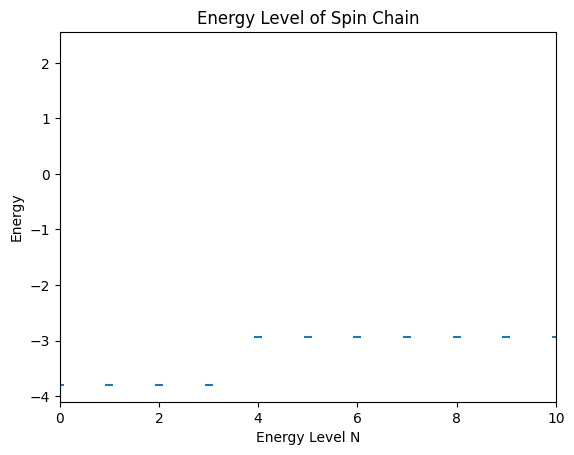

In [56]:
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
#plt.ylim(-5,-4)
plt.xlim(0,10)
plt.title('Energy Level of Spin Chain')

<font  face=Times color=darkblue size=3> Then we find the ground state by searching for the lowest energy.

#### Another way to flip spins

In [57]:
# for a string '00001', if we flip the index 3 and 4
str_='00001'
# instead of concatenation, we can convert it to list first
site_3=str_[3]
site_4=str_[4]
list_=list(str_)
print(list_)
list_[3]=site_4
list_[4]=site_3
#convert it back to string
str_=''.join(list_)
str_

['0', '0', '0', '0', '1']


'00010'

therefore, to construct the Hamiltonian:

In [58]:
# Matrix Construction
H=np.zeros((dimension,dimension))
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain # make the length equal to N
# for PBC, we set i in range(N)
# for OBC, we set i in range(N-1)
    for i in range(N):
        j=np.mod(i+1,N)
        if state_chain[i]==state_chain[j]: # i=j only diagonal elements
            H[a,a]+=0.25
        else:                              # else, the raising/lowering operators also have contributions
            H[a,a]-=0.25
            # then exchange i,j
            element_i=state_chain[i]
            element_j=state_chain[j]
            #flip
            chain1=list(state_chain)
            chain1[i]=element_j
            chain1[j]=element_i
            b=int(''.join(chain1),2)
            H[a,b]+=0.5

In [59]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates
# ground state wave function
idx_sorted1 = np.argsort(eig_value)
eig_value=eig_value[idx_sorted1]
eig_vec=eig_vec[:,idx_sorted1]
eig_value[0], eig_vec[:,0]

(-3.7972997839370204,
 array([ 0.00000000e+00,  1.93649512e-17, -1.94925156e-16,  2.30287798e-16,
        -2.64165792e-16,  1.34179341e-16, -3.28699537e-16, -3.08595536e-16,
         3.96896497e-16, -1.91187100e-16, -1.24299117e-16,  1.08102652e-16,
         2.67883533e-16, -2.59480642e-16,  1.71625853e-16,  1.31449714e-04,
         1.77277948e-16,  1.64790020e-16, -7.28733462e-17, -2.67485676e-16,
        -3.46817577e-18,  7.03428936e-16, -1.98697594e-16, -9.13533797e-04,
        -3.03456700e-16, -2.18232222e-16,  1.34178033e-16,  1.87206947e-03,
        -2.18780806e-16, -1.06657639e-03,  1.79641126e-04, -5.34825871e-04,
        -4.05523729e-16,  6.37756676e-17,  8.85700257e-17,  3.15629672e-16,
        -9.66298635e-18, -1.04930958e-15,  2.49848065e-16,  2.18778331e-03,
        -3.04130859e-16,  3.58752905e-16, -3.04775675e-16, -6.91618633e-03,
         1.21187371e-16,  4.37779719e-03, -7.46828841e-04,  7.59484526e-03,
        -6.68028854e-17, -2.61407699e-16,  9.18090226e-17,  3.5576

Text(0.5, 1.0, 'Energy Level of Spin Chain')

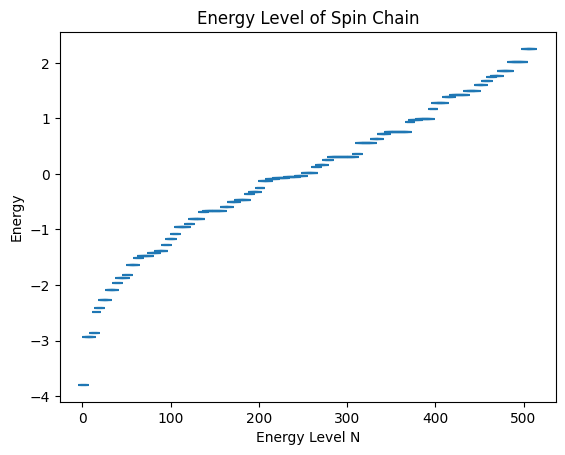

In [60]:
energy_level=np.sort(eig_value)
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
plt.title('Energy Level of Spin Chain')

### measurement

<font  face=Times color=darkblue size=3> To measure observables, we take $S^z$ as an example. The expectation value of the n:th eigenstate is $$<n|S^z|n>=[U^{\dagger}S^zU]_{nn}$$ where U is the matrix whose columns are the eigenvectors. <br> To construct the matrix of the operator, the method is quite similar to that of hamiltonian, but there is only diagonal elements: $S^z_{aa}=+\frac{1}{2}n-\frac{1}{2}(N-n)$.

<font  face=Times color=darkblue size=3> We measure both the  $\langle S_z\rangle$ and $\langle S_{total}^2\rangle$, for the latter, we only have it for 2-site OBC problem.

In [61]:
matrix_U=np.zeros((dimension,dimension)) #mat_U
matrix_Udag=np.zeros((dimension,dimension))
for i in range(dimension):
    matrix_U[:,i]=eig_vec[:,i].reshape(dimension)
    matrix_Udag[i,:]=np.conj(eig_vec[:,i].reshape(dimension))

In [62]:
mat_Sz=np.zeros((dimension,dimension))
mat_S2=np.zeros((dimension,dimension))

In [63]:
##construct Sz matrix
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain #make the length equal to N
    up_number=state_chain.count('1')
    down_number=N-up_number
    mat_Sz[a,a]=0.5*up_number-0.5*down_number

mat_S2=3*N/8*np.identity(dimension)+H              # this measurement is written for N=2 only

In [64]:
mat_Sz

array([[-4.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. , -3.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -3.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  3.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  3.5,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  4.5]])

In [65]:
mat_S2

array([[5.625, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 4.625, 0.5  , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.5  , 4.625, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 4.625, 0.5  , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.5  , 4.625, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 5.625]])

In [66]:
mz_list=[]
s2_list=[]
for i in range(dimension):
    mz_list.append(np.dot(np.dot(matrix_Udag,mat_Sz),matrix_U)[i,i])#measure
    s2_list.append(np.dot(np.dot(matrix_Udag,mat_S2),matrix_U)[i,i])#measure s^2

In [67]:
mz_list

[0.4957559769550336,
 -0.4294550901124431,
 -0.42054746499986745,
 0.4999989296473796,
 -0.40912681437506315,
 -1.4999999967296436,
 0.44084472910792605,
 -1.4997912753137825,
 0.5081069842930577,
 -0.5003165801086177,
 1.464749660827409,
 1.4759204583610053,
 -0.4999209081144034,
 0.4999311568533923,
 -0.49999999999999983,
 0.4999393889091631,
 0.49999998461626716,
 -0.4999999999999999,
 -0.4999999999999999,
 0.49999967390649125,
 0.4999771786874567,
 -0.4999663988069866,
 0.25080691989857307,
 0.8834939255453492,
 0.1777032546095912,
 -1.499999987524363,
 -1.48073561587239,
 0.6352804287630507,
 1.1354293490778953,
 0.05608394356524497,
 0.9945316265617233,
 0.8837899344287952,
 -1.1255176630502457,
 -0.7223567083816744,
 0.42231841601263814,
 1.4062278222858946,
 -0.30948333175182197,
 -1.4999971482519912,
 -0.4069561172896002,
 0.45475661985166926,
 0.450673517210185,
 -0.4999999999999999,
 1.1574240099880462,
 1.2121829624398055,
 0.8454818410954921,
 -1.18546742242239,
 0.4621398

In [68]:
s2_list

[-0.42229978393700973,
 -0.4222997839370097,
 -0.42229978393700984,
 -0.42229978393700973,
 0.43885933836549273,
 0.4388593383654928,
 0.43885933836549273,
 0.4388593383654932,
 0.4388593383654928,
 0.438859338365493,
 0.43885933836549285,
 0.43885933836549273,
 0.521002090263198,
 0.5210020902631978,
 0.5210020902631975,
 0.5210020902631978,
 0.8929491924311229,
 0.8929491924311228,
 0.9697503174659192,
 0.9697503174659194,
 0.9697503174659197,
 0.9697503174659197,
 1.0987633731130368,
 1.0987633731130366,
 1.0987633731130364,
 1.0987633731130368,
 1.0987633731130368,
 1.0987633731130375,
 1.0987633731130368,
 1.098763373113037,
 1.285987107836279,
 1.2859871078362792,
 1.2859871078362786,
 1.2859871078362788,
 1.2859871078362786,
 1.2859871078362788,
 1.2859871078362795,
 1.2859871078362788,
 1.4066762933455812,
 1.4066762933455816,
 1.4066762933455814,
 1.4066762933455814,
 1.4982909802060749,
 1.4982909802060744,
 1.498290980206074,
 1.4982909802060735,
 1.4982909802060742,
 1.4982

<font  face=Times color=darkblue size=3> The ground state is non-degenerate, while the 1st excited states are degenerate (for 2 site problem).

<font  face=Times color=darkblue size=3> Now, we see that for the antiferromagnet, the $S^z$ is generally equal to $0$ at ground state if N is even. And we can also see the $S_z$ at the triplet.
    <br><br> You can check the value of $S_z$ if N is odd.

### Renyi Entropy

We have learned from the classical statistics physics that the classical entrophy of a system has the form:
$$
S = \sum_i -p_i \ln p_i
$$

It is easily promoted to quantum case by utilizing the properies of density matrix. Since the eigenvalue of the density matrix is the probability of the occupation. In the eigenvector basis of the density matrix, we have the same definition as in classical case:
$$
S = \sum_i -p_i \ln p_i = -Tr(\rho\ln (\rho))
$$  
This is called von Neumann entropy or Shannon entrophy. In some modern many body numerical techniques where the wave function is implicit thus we cannot directly calculate the Von Neumann entropy(Like Monte Carlo). However, in a generalized form of Von Neumann entropy which we called renyi entrophy defined as below.
$$S^{(n)}_A = \frac{1}{1-n} \ln (Tr (\rho_A^n))$$.
It can be analytically reduced to the Von Neumann Entanglement entropy when $n\to 1$,

$$S^{vN}_A=-Tr(\rho_A \ln \rho_A)$$

And also bear the feature that it can be evaluated in Monte Carlo method.

### Renyi Entropy measurement
We calculate the second order renyi enrophy below, where we plot the second order renyi enrophy as a function of subsystem size in a periodic chain with length 9.

The density matrix of the subsystem is getting by tracing out the contribution from the environment.

In [69]:
def cal_renyi(psi,si,L,order):
  size1 = 2**(si)
  size2 = 2**(L-si)
  psi = psi.reshape((size1,size2))
  #reduced density matrix
  rho_r = psi@psi.T
  # print(rho_r)
  # print(np.linalg.eig(rho_r)[0])
  prob = np.linalg.eig(rho_r)[0]/np.trace(rho_r)
  renyi = (1/(1-order))*np.log(np.sum(prob**order))
  return renyi


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


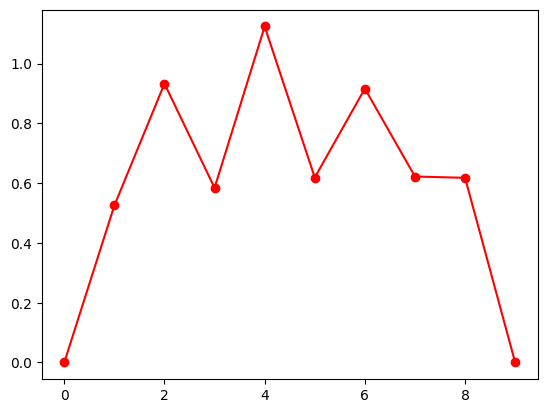

In [70]:
gs = eig_vec[:,0]
na_list = np.arange(0,10)
EE_list = []
for i in range(len(na_list)):
  na_here = na_list[i]
  EE_here = cal_renyi(eig_vec[:,0],na_here,N,2)
  EE_list.append(EE_here)
plt.plot(na_list,EE_list,"ro-")

**We put the result for L = 64 Heisenberg chain we calculated from Monte Carlo calculation here for reference.**

Theorically, critical chains described by conformal field theory (CFT) display alogarithmic violation of the strict area law, as Renyi entropies grow with the subsystem length (A followingthe universal form

$$S_q(A) =\frac{c}{6}(1+\frac{1}{q})\ln(\frac{N}{\pi}\sin [\frac{\pi l_A}{N}])+s_q+\cdots $$

for periodic chains of length L, where c is the central charge of the CFT. The constant term s, is non-universal but can be evaluated exactly in some cases. By linear fittng of the variables $S^{(2)}_A$ and $\ln(\frac{N}{\pi}\sin [\frac{\pi l_A}{N}])$. We derive $\frac{c}{6}(1+\frac{1}{q}) = \frac{1}{4}$. We have $c = 1$ by CFT, thus $q = 2$ for Heisenberg chain.

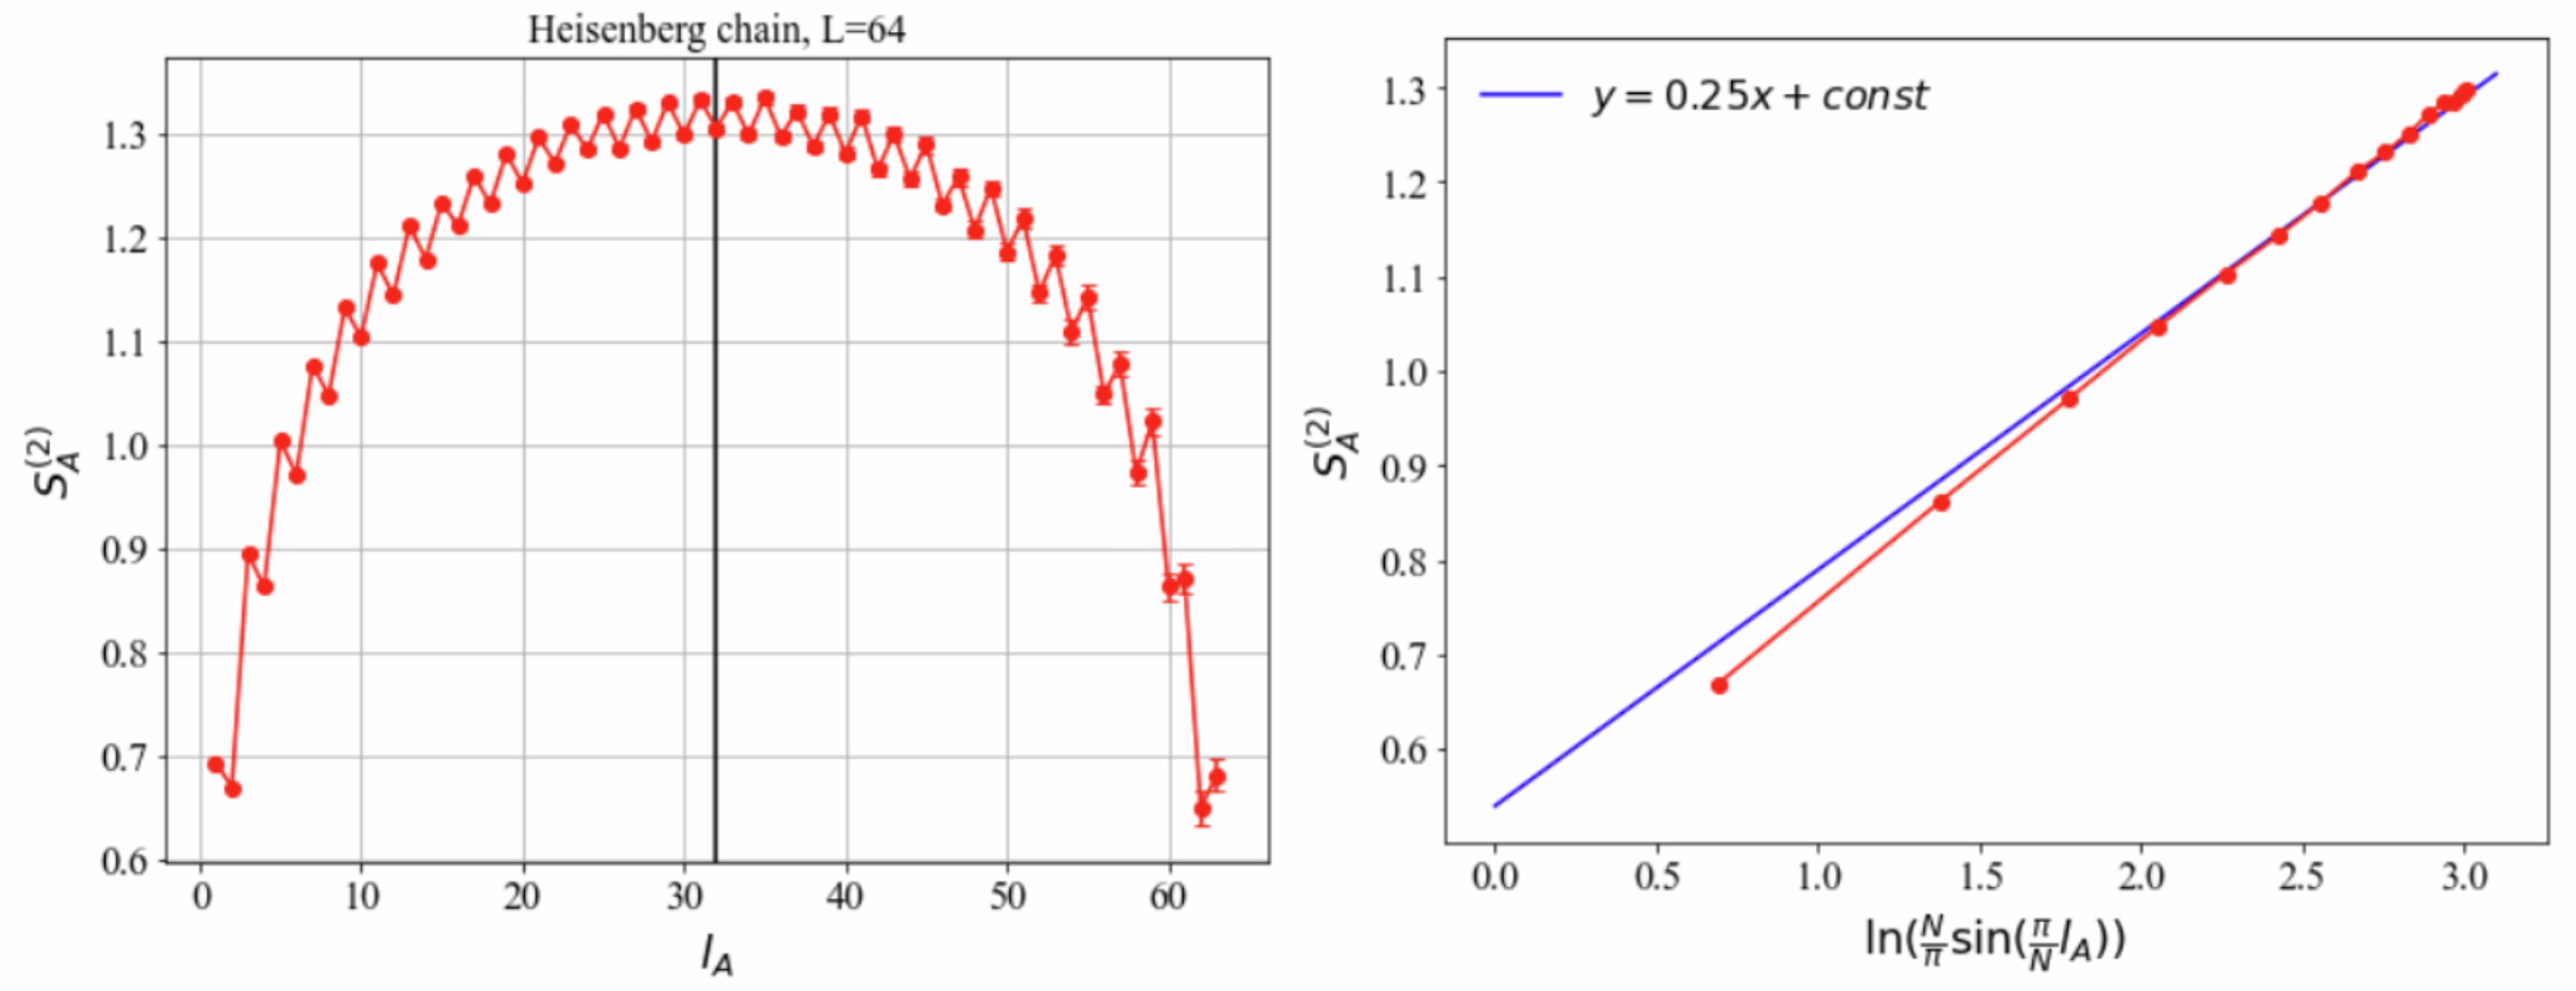